<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week5_Bivariate_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate and Multivariate Normal Distribution 

## Bivariate Normal

Just as in the univariate case, the Guassian function provides a sort of "home base" distribution family for multivariate distributions.   Let's start with the bivariate normal.


### PDF

The PDF for the standard bivariate normal is given by

$$f_{(X,Y)}(x,y) = \frac{1}{2\pi}e^{-\frac{x^2 + y^2}{2}}$$


We see that

$$\frac{1}{2\pi}e^{-\frac{x^2 + y^2}{2}} =  \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2 }{2}} \times \frac{1}{\sqrt{2\pi}}e^{-\frac{y^2 }{2}}$$

and hence

$$f_{(X,Y)}(x,y)  = \phi(x) \phi(y)$$

meaning that $X$ and $Y$ are independent and each marginal is just the single variable stanard normal distribution.

#### Correlation

If we wish to introduce correlation, we can modify this PDF to

$$f_{(X,Y)}(x,y) = \frac{1}{2\pi \sqrt{1-\rho^2}}e^{-\frac{x^2 -2\rho x y +  y^2}{2(1-\rho^2)}}$$

We then find that $\mathrm{corr}(X,Y) = \rho$ while the marginals of $X$ and $Y$ remain $\mathcal{N}(0,1)$



#### Covariance

Now suppose we wanted to introduce marginal variances other than one, we can denote desired covariance matrix as

$$\Sigma = \begin{bmatrix} \sigma^2_X & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \\ \end{bmatrix}$$
    
    
We define the quadratice form 

$$Q(x,y) = \begin{bmatrix} x & y \\ \end{bmatrix} \Sigma^{-1}  \begin{bmatrix} x \\ y \\ \end{bmatrix}$$ 

And define $$f_{(X,Y)}(x,y) = \frac{1}{2\pi \sqrt{\det(\Sigma)}} e^{-\frac{Q(x,y)}{2}}$$


Then we will have marginals that are $\mathcal{N}(0,\sigma_X^2)$ and $\mathcal{N}(0,\sigma_Y^2)$

respectively.


#### Location

Finally, if we wish to center the distribution somewhere other than zero, we use

$$f_{(X,Y)}(x,y) = \frac{1}{2\pi \det(\Sigma)} e^{-\frac{Q(x-\mu_X,y-\mu_Y)}{2}}$$


## Let's plot this 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
from scipy.integrate import quad, dblquad

We first plot the most generic version. 

$$f_{(X,Y)}(x,y) = \frac{1}{2\pi}e^{-\frac{x^2 + y^2}{2}}$$

In [ ]:
f = lambda x,y: 1/(2*np.pi)* np.exp(-(x**2 +y**2)/2)

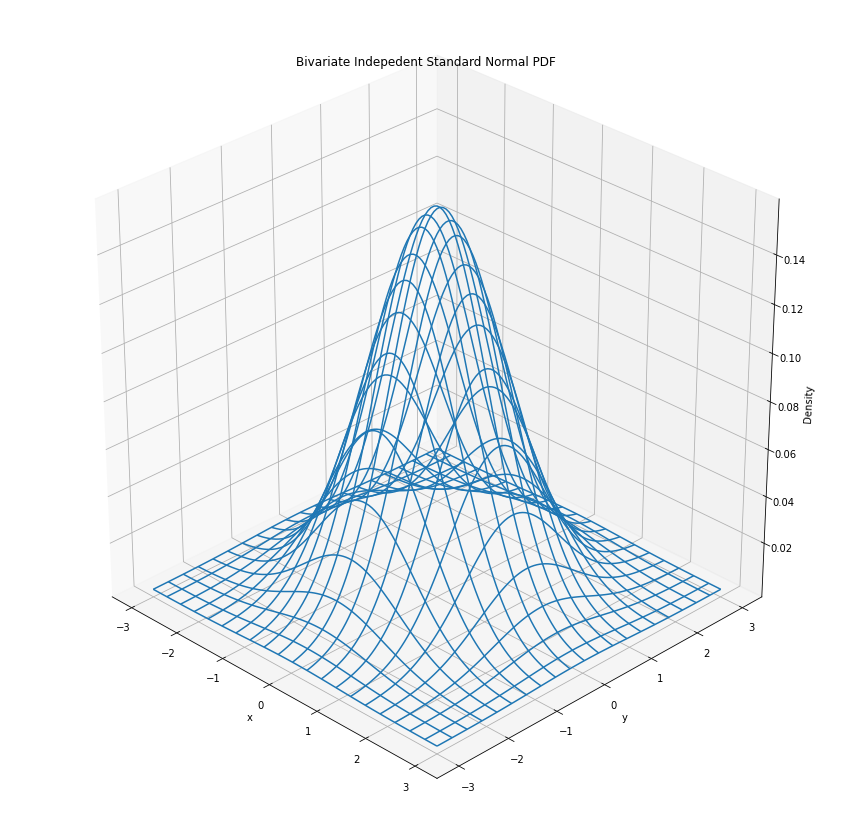

In [ ]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

xs, ys = np.meshgrid(x,y)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(xs,ys,f(xs,ys))

ax.plot_wireframe(xs, ys ,f(xs,ys), rstride=5, cstride=5)


plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("Density")

ax.view_init(30, -45)

plt.title("Bivariate Indepedent Standard Normal PDF")

plt.show()

Next, we introduce some correlation.

In [ ]:

rho = .7
f = lambda x,y: 1/(2*np.pi*np.sqrt(1-rho**2))* np.exp(-(x**2 -2*rho*x*y+y**2)/(2*(1-rho**2)))

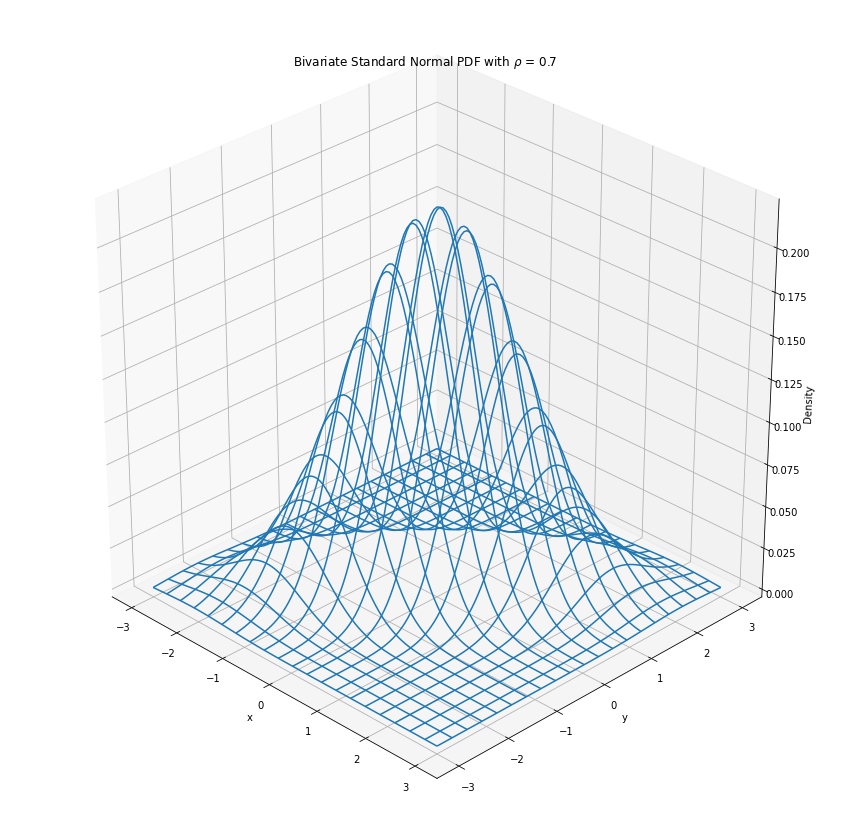

In [ ]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

xs, ys = np.meshgrid(x,y)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(xs,ys,f(xs,ys))

ax.plot_wireframe(xs, ys ,f(xs,ys), rstride=5, cstride=5)


plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("Density")

ax.view_init(30, -45)

plt.title("Bivariate Standard Normal PDF with $\\rho$ = "+str(rho))

plt.show()

Next, we create a more general covariance matrix.

In [ ]:
sigx = 1
sigy = 3
rho = .5

SIGMA = np.array([[sigx**2, rho*sigx*sigy], [rho*sigx*sigy, sigy**2]])

SIGINV = np.linalg.inv(SIGMA)

Q = lambda x,y: np.array([x,y]) @ SIGINV @ np.array([x,y])
Qv = np.vectorize(Q)

f = lambda x,y: 1/(2*np.pi*np.sqrt(np.linalg.det(SIGMA)))* np.exp(-Qv(x,y)/2)

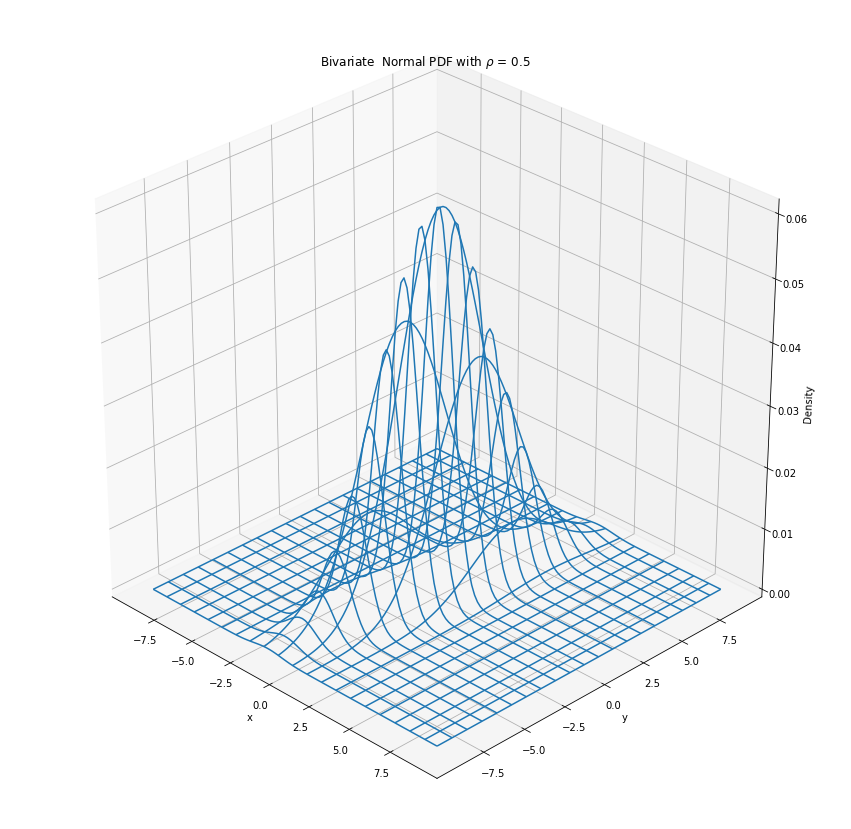

In [ ]:
x = np.linspace(-9,9,100)
y = np.linspace(-9,9,100)

xs, ys = np.meshgrid(x,y)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(xs,ys,f(xs,ys))

ax.plot_wireframe(xs, ys ,f(xs,ys), rstride=5, cstride=5)


plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("Density")

ax.view_init(30, -45)

plt.title("Bivariate  Normal PDF with $\\rho$ = "+str(rho))

plt.show()

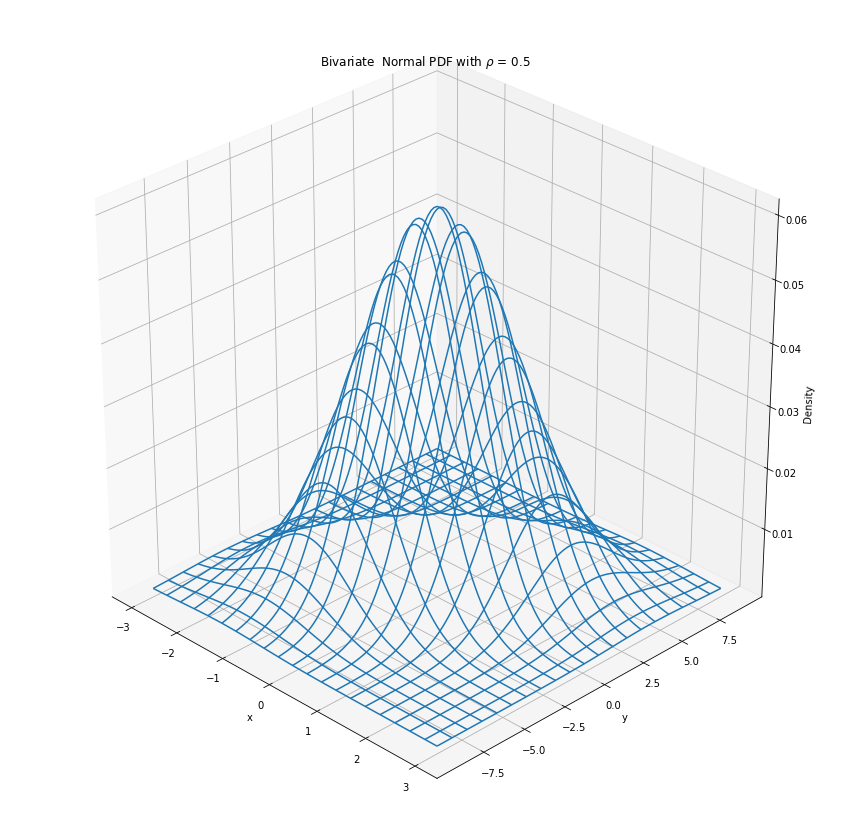

In [ ]:
# Same as above but with y axis rescaled

x = np.linspace(-3*sigx,3*sigx,100)
y = np.linspace(-3*sigy,3*sigy,100)

xs, ys = np.meshgrid(x,y)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(xs,ys,f(xs,ys))

ax.plot_wireframe(xs, ys ,f(xs,ys), rstride=5, cstride=5)


plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("Density")

ax.view_init(30, -45)

plt.title("Bivariate  Normal PDF with $\\rho$ = "+str(rho))

plt.show()

Finally, we can shift our center to arbitray locations.

In [ ]:
sigx = 1
sigy = 3
rho = .5

mux = 100
muy = 50

SIGMA = np.array([[sigx**2, rho*sigx*sigy], [rho*sigx*sigy, sigy**2]])

SIGINV = np.linalg.inv(SIGMA)

Q = lambda x,y: np.array([x,y]) @ SIGINV @ np.array([x,y])
Qv = np.vectorize(Q)

f = lambda x,y: 1/(2*np.pi*np.sqrt(np.linalg.det(SIGMA)))* np.exp(-Qv(x-mux,y-muy)/2)

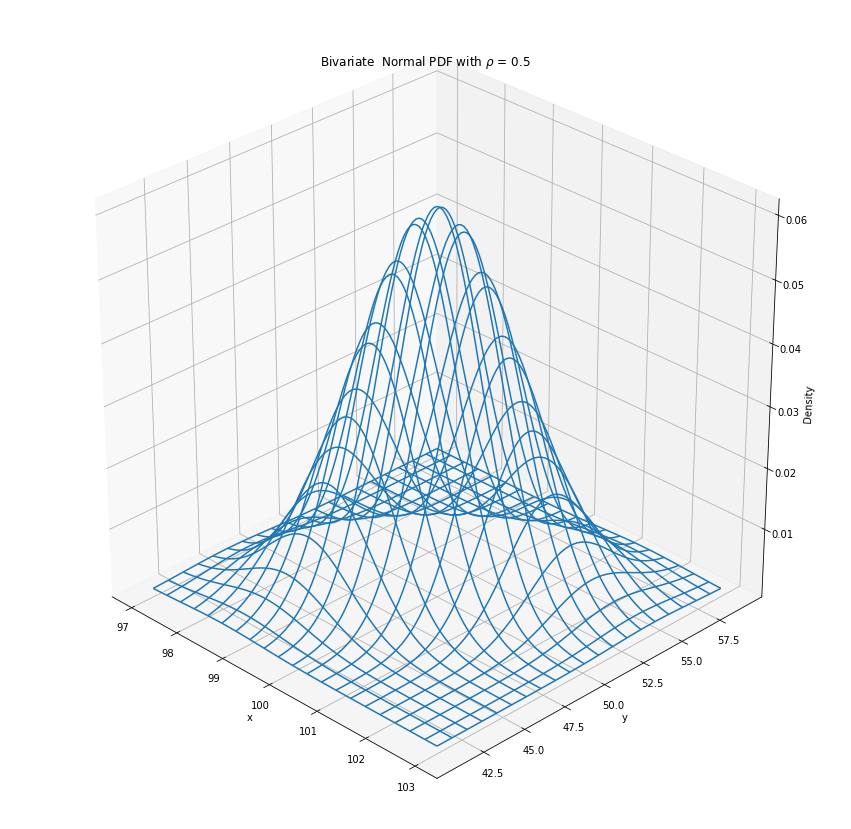

In [ ]:


x = np.linspace(mux-3*sigx,mux + 3*sigx,100)
y = np.linspace(muy-3*sigy,muy +3*sigy,100)

xs, ys = np.meshgrid(x,y)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# ax.plot_surface(xs,ys,f(xs,ys))

ax.plot_wireframe(xs, ys ,f(xs,ys), rstride=5, cstride=5)


plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("Density")

ax.view_init(30, -45)

plt.title("Bivariate  Normal PDF with $\\rho$ = "+str(rho))

plt.show()

## Nothing special about "bivariate"


Everything here can be extended to $n$ dimensions. We use an $n \times n$ covariance matrix $\Sigma$.  Just define an analogous quadtric form $Q(\mathbf{x}; \Sigma) = \mathbf{x}^T \Sigma^{-1}\mathbf{x}$ and a mean vector $\mathbf{\mu}$. 

The only other necessary change is that the the denominator of of coefficient becomes

$$C = \frac{1}{\left(2 \pi  \right)^{n/2}\sqrt{\det(\Sigma)}}$$

Then,

$$f_{\mathbf{X}}(\mathbf{x};\mathbf{\mu}, \Sigma) = C e^{-Q(\mathbf{x- \mu)}/2}$$





## Scipy does this


You don't need to code this all up of course, scipy has it covered.

Just use multivariate_normal

In [ ]:
help(ss.multivariate_normal)

Help on multivariate_normal_gen in module scipy.stats._multivariate object:

class multivariate_normal_gen(multi_rv_generic)
 |  multivariate_normal_gen(seed=None)
 |  
 |  A multivariate normal random variable.
 |  
 |  The `mean` keyword specifies the mean. The `cov` keyword specifies the
 |  covariance matrix.
 |  
 |  Methods
 |  -------
 |  ``pdf(x, mean=None, cov=1, allow_singular=False)``
 |      Probability density function.
 |  ``logpdf(x, mean=None, cov=1, allow_singular=False)``
 |      Log of the probability density function.
 |  ``cdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5, releps=1e-5)``
 |      Cumulative distribution function.
 |  ``logcdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5, releps=1e-5)``
 |      Log of the cumulative distribution function.
 |  ``rvs(mean=None, cov=1, size=1, random_state=None)``
 |      Draw random samples from a multivariate normal distribution.
 |  ``entropy()``
 |      Comp